In [1]:
# !pip install factor_analyzer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


# Customer Satisfaction Analysis
Paulina Leal Mosqueda, A01659576

Santiago Nava Figueroa, A01174557

# Introducción
Entender la opinión de los clientes dentro de la empresa TechnoServe, es de alta importancia porque, a partir de esto, se pueden encontrar estrategias diseñadas para mejorar la atención del cliente y el servicio. Lo cual, puede repercutir en la cantidad de retención de clientes que se tiene y el crecimiento del negocio. Por esto, el objetivo, de este proyecto, será encontrar los factores que influyen más en los clientes y proponer un plan de acción enfocado en mejorar los servicios que influyen más en la opinión del cliente.

# Part 1

En primer lugar, se tomarán los datos proporcionados por la empresa y se hará una exploración de ellos para poder tener una visión general de la opinión de los clientes. A partir de esto, se intentarán buscar patrones que sugieran alguna relación entre las variables y, por ende, que presenten alguna información relevante, que pueda ser usada para generar un plan de acción.

En primer lugar, será necesario exportar los datos de la base de datos.

In [2]:
# Cargar base de datos.
df = pd.read_csv('customer_satisfaction_data.csv')
df.head()

,customer_id,quarter,survey_date,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,...,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
0,CUST_001,Q1_2024,2024-03-22,5.0,6.0,4.0,5.0,4.0,5.0,5.0,...,4.0,4.0,2.0,6.0,6.0,4,6,4,12.3,1
1,CUST_002,Q1_2024,2024-03-20,5.0,3.0,4.0,5.0,5.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4,5,3,17.8,0
2,CUST_003,Q1_2024,2024-03-17,4.0,3.0,4.0,3.0,4.0,4.0,3.0,...,4.0,4.0,3.0,4.0,3.0,3,4,3,-7.8,0
3,CUST_004,Q1_2024,2024-03-08,3.0,4.0,4.0,3.0,2.0,3.0,4.0,...,4.0,4.0,4.0,2.0,4.0,4,5,2,-13.4,0
4,CUST_005,Q1_2024,2024-03-12,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,6.0,5.0,4.0,5.0,4.0,5,5,4,3.7,2


In [3]:
df.shape

(3400, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 3400 non-null   object 
 1   quarter                     3400 non-null   object 
 2   survey_date                 3400 non-null   object 
 3   account_manager_responsive  3384 non-null   float64
 4   billing_accuracy            3387 non-null   float64
 5   budget_control              3383 non-null   float64
 6   change_management           3388 non-null   float64
 7   communication_clarity       3384 non-null   float64
 8   competitive_pricing         3385 non-null   float64
 9   cost_transparency           3390 non-null   float64
 10  documentation_help          3386 non-null   float64
 11  executive_access            3390 non-null   float64
 12  innovation_solutions        3390 non-null   float64
 13  long_term_partnership       3386 

In [5]:
# Ver cantidad de valores nulos por variable.
df.isna().sum()

customer_id                    0
quarter                        0
survey_date                    0
account_manager_responsive    16
billing_accuracy              13
budget_control                17
change_management             12
communication_clarity         16
competitive_pricing           15
cost_transparency             10
documentation_help            14
executive_access              10
innovation_solutions          10
long_term_partnership         14
problem_solving               20
project_management            17
quality_deliverables          13
roi_demonstration             17
support_responsiveness        17
system_integration            14
technical_documentation       19
technical_expertise            9
timeline_adherence             8
training_quality              17
trust_reliability             22
value_for_money               15
overall_satisfaction           0
nps_score                      0
renewal_likelihood             0
revenue_growth_pct             0
referrals_

**Descripción general**

Luego de obtener la base de datos, se encontró lo siguiente:

* Hay 3400 filas y 31 columnas.
* Existen 24 variables float, 4 son enteras y 3 son objetos.
* Las variables objeto, son el ID del cliente, la fecha de la encuesta y el cuarto de año en que fue realizada.

Además de las variables mencionadas anteriormente, también se encontró que existen 23 variables que representan la calificación que le asignaron al tema en particular. Estas variables son las siguientes:

`technical_expertise`, `problem_solving`, `innovation_solutions`,
`technical_documentation`, `system_integration`,
`account_manager_responsive`, `executive_access`, `trust_reliability`,
`long_term_partnership` `communication_clarity`,
`project_management`, `timeline_adherence`, `budget_control`, `quality_deliverables` `change_management`,
`cost_transparency`, `value_for_money` `roi_demonstration`,
`competitive_pricing`, `billing_accuracy`, `support_responsiveness`, `training_quality` y `documentation_help`.


Por su parte, también hay 5 variables que muestran los resultados obtenidos en la encuesta, donde se tiene:

- **`overall_satisfaction`** (1-7): Satisfacción general de las soluciones de TechnoServe
- **`nps_score`** (0-10): probabilidad de recomendación.
- **`renewal_likelihood`** (1-5): probabilidad de que el cliente renueve el contrato.
- **`revenue_growth_pct`** (continúa): crecimiento año con año de la empresa.
- **`referrals_generated`** (entero): número de referencias por trimestre.


El hecho de que sean 23 variables de satisfacción, significa un reto en la interpretabilidad de los datos, ya que entender la opinión de los clientes requeriría analizar cada variable por separado. No obstante, al hacer esto, se estaría omitiendo la posibilidad de que estas variables estén correlacionadas y que, en conjunto, puedan formar factores que capturen información relevante sobre la satisfacción del cliente. Por esta razón, se realizarán cálculos estadísticos descriptivos y se generarán distintas matrices de correlación, con el fin de observar si existen relaciones o factores que no se están considerando.


In [6]:
# Calcular estádisticas descriptivas básicas
df.describe()

,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,documentation_help,executive_access,innovation_solutions,...,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
count,3384.000000,3387.000000,3383.000000,3388.000000,3384.000000,3385.000000,3390.000000,3386.000000,3390.000000,3390.000000,...,3391.000000,3392.000000,3383.000000,3378.000000,3385.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,4.115248,4.101270,4.100798,4.109504,4.092494,4.079468,4.100885,4.079445,4.113569,4.105310,...,4.115305,4.110554,4.072421,4.100355,4.091581,4.125588,6.169118,3.070294,6.072176,1.615588
std,0.970303,0.962109,0.983397,0.977813,0.964956,0.979341,0.981008,0.979800,0.969478,0.985496,...,0.974591,0.981026,0.998707,0.961346,0.975105,0.817824,1.777549,0.761728,8.315453,1.510634
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-24.700000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,5.000000,3.000000,0.300000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,3.000000,6.150000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,4.000000,11.700000,2.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,5.000000,40.100000,9.000000


In [7]:
#Visualización de matriz de correlación

# Tomar variables de satisfacción
satisfaction_vars = [
    'technical_expertise', 'problem_solving', 'innovation_solutions', 'technical_documentation', 'system_integration',
    'account_manager_responsive', 'executive_access', 'trust_reliability', 'long_term_partnership', 'communication_clarity',
    'project_management', 'timeline_adherence', 'budget_control', 'quality_deliverables', 'change_management',
    'cost_transparency', 'value_for_money', 'roi_demonstration', 'competitive_pricing', 'billing_accuracy',
    'support_responsiveness', 'training_quality', 'documentation_help'
]

# Variables de outcome
outcome_vars = [
    'overall_satisfaction', 'nps_score', 'renewal_likelihood',
    'revenue_growth_pct', 'referrals_generated'
]


**Matriz de correlación**

Antes de generar las matrices de correlación, es importante destacar que la base de datos tiene 31 columnas, por lo que generar una matriz de todas las variables sería casi ilegible. Por esta razón, se hará una matriz de correlación que únicamente tome en cuenta a las variables de satisfacción, ya que a partir de estas, se busca entonces si existe alguna relación entre las variables.

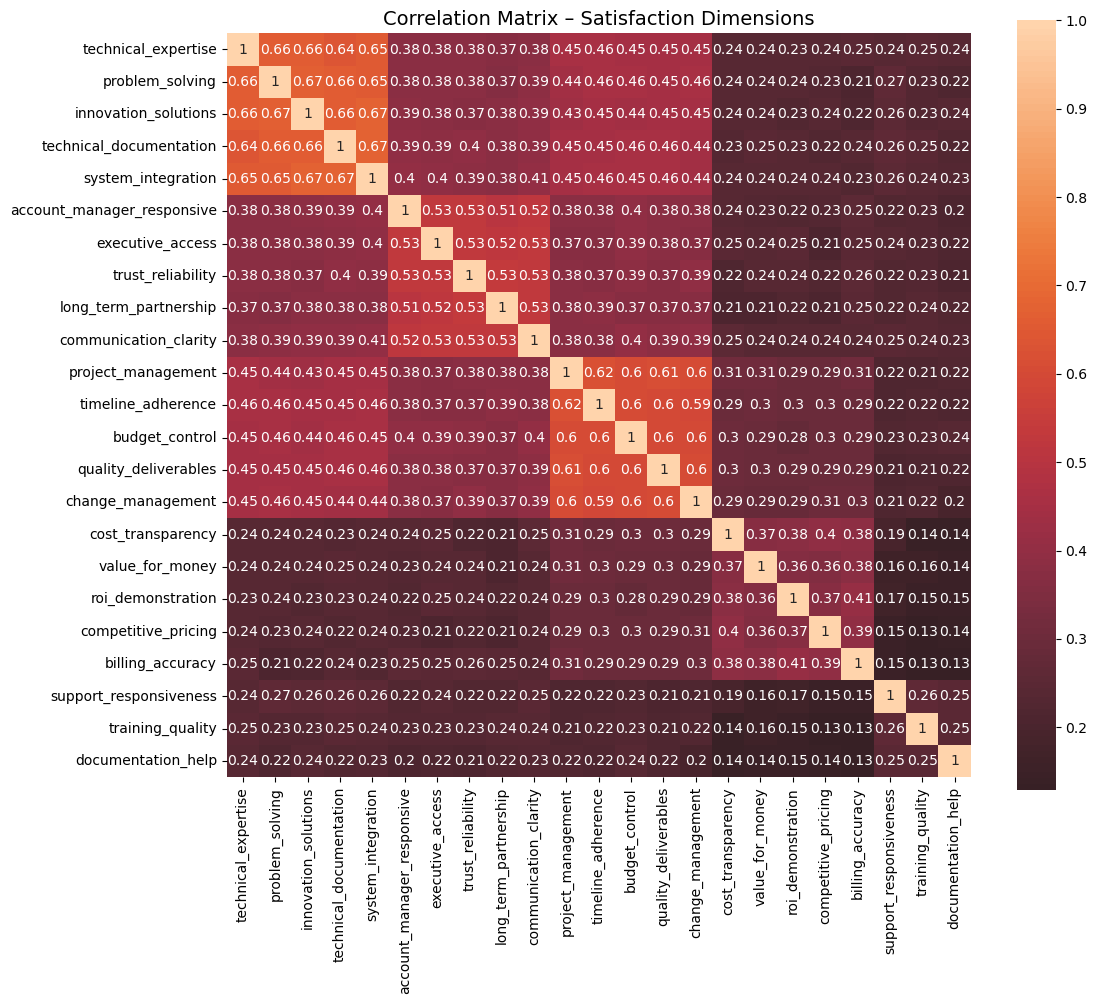

In [8]:
# Matriz de correlación para las variables de satisfacción
corr = df[satisfaction_vars].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, center=0, square=True, annot=True)
plt.title("Correlation Matrix – Satisfaction Dimensions", fontsize=14)
plt.show()


En primera instancia, se puede observar que hay una correlación por arriba del 0.6 entre las variables
`technical_expertise`, `problem_solving`, `innovation_solutions`,
`technical_documentation` y `system_integration`.

Se tiene una corrección por arriba de 0.5 en las variables `account_manager_responsive`, `executive_access`, `trust_reliability`,
`long_term_partnership` y `communication_clarity`.


De igual manera, las variables `project_management`, `timeline_adherence`, `budget_control`, `quality_deliverables` y `change_management` tienen una correlación por arriba del 0.5.

Por otro lado, superando un umbral del 0.3, se encontraron las variables de `cost_transparency`, `value_for_money`, `roi_demonstration`,
`competitive_pricing` y  `billing_accuracy`.

Cabe destacar que las variables `support_responsiveness`, `training_quality` y `documentation_help`, tienen coeficientes menores al 0.3, por lo que no hay suficiente evidencia para decir que estas variables están correlacionadas.


También se encontró que hay una correlación por arriba del umbral del 0.3 entre las variables de cuestiones técnicas, resolución de problemas, gestión de proyectos y calidad. Asimismo, en algunas de las variables que corresponden a la transparencia y finanzas de la empresa, se encontró que tienen correlación con las de gestión de proyectos y su calidad. Como es el caso, de las variables
`value_for_money` y `project_management` con una correlación del 0.31.

Aunado a esto, las variables relacionadas con el soporte y servicios, no tienen correlación con ninguna otra.

Por lo tanto, a partir de esto, es posible observar que existen variables que probablemente se pueden agrupar, dado su alta correlación, ya que tienen valores por arriba del 0.5. No obstante, es necesario, continuar haciendo una exploración de los datos, ya que aún con estas separaciones entre variables, la mayoría tiene una correlación por arriba del 0.3. Esto sugiere que, en efecto, es posible encontrar información adicional si se intenta hacer una exploración profunda de estas relaciones, pero aun así será necesario, definir si es posible realizar una agrupación o división entre las diferentes variables.

Por esta razón, como manera de exploración, se dividirán a las variables como variables dedicadas a innovación técnica, gestión de relaciones y comunicación, gestión de proyectos y calidad, finanzas y servicios de soporte. Es decir, las variables se dividirán por las áreas de la consultora: Technical Excellence & Innovation, Relationship Management & Communication, Project Delivery & Quality, Value & Financial Transporency y Support & Service Ecellence. En este caso, el objetivo de esto, es desplegar una matriz de correlación entre las diferentes áreas y facilitar la visualización de las correlaciones que se observaron que estaban entre el 0.3 y 0.4.

In [9]:
# Dividir las variables por áreas de satisfacción
technical_innovation = [
    'technical_expertise', 'problem_solving', 'innovation_solutions',
    'technical_documentation', 'system_integration'
]

relationship_comm = [
    'account_manager_responsive', 'executive_access', 'trust_reliability',
    'long_term_partnership', 'communication_clarity'
]

project_quality = [
    'project_management', 'timeline_adherence', 'budget_control',
    'quality_deliverables', 'change_management'
]

value_financial = [
    'cost_transparency', 'value_for_money', 'roi_demonstration',
    'competitive_pricing', 'billing_accuracy'
]

support_service = [
    'support_responsiveness', 'training_quality', 'documentation_help'
]

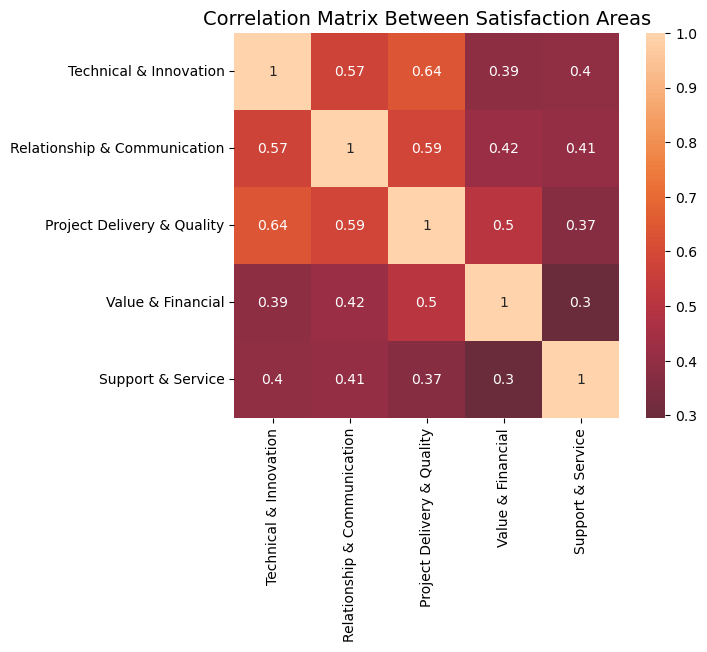

In [10]:
# Matriz por área
areas = {
    "Technical & Innovation": technical_innovation,
    "Relationship & Communication": relationship_comm,
    "Project Delivery & Quality": project_quality,
    "Value & Financial": value_financial,
    "Support & Service": support_service
}

# Create a new column per area
for area, vars in areas.items():
    df[area] = df[vars].mean(axis=1) # Calcular la media de cada calificación por área

area_cols = list(areas.keys())
corr_areas = df[area_cols].corr() # Calcular la correlación

plt.figure(figsize=(7,5))
sns.heatmap(corr_areas, annot=True, center=0, square=True)
plt.title("Correlation Matrix Between Satisfaction Areas", fontsize=14)
plt.show()

Esta matriz reafirma las observaciones hechas anteriormente, donde se encontró que todas las áreas tienen una correlación por arriba del 0.3. No obstante, la diferencia radica, en el hecho de que ahora se puede observar que las variables de soporte y servicios, en conjunto, sí tienen una correlación con el resto de las áreas. Asimismo, las áreas que cuentan con una correlación más fuerte son las de Technical & Innovation y Project Delivery & Quality.

Una vez que se identificaron ciertas variables que tienen correlación alta y otras con correlación moderada, se generará una matriz de correlación que explore el efecto que cada variable tiene en los resultados finales de la encuesta (outcome). Esto ayudará a observar si hay variables que influyen más en la opinión de los clientes y los resultados de la empresa.

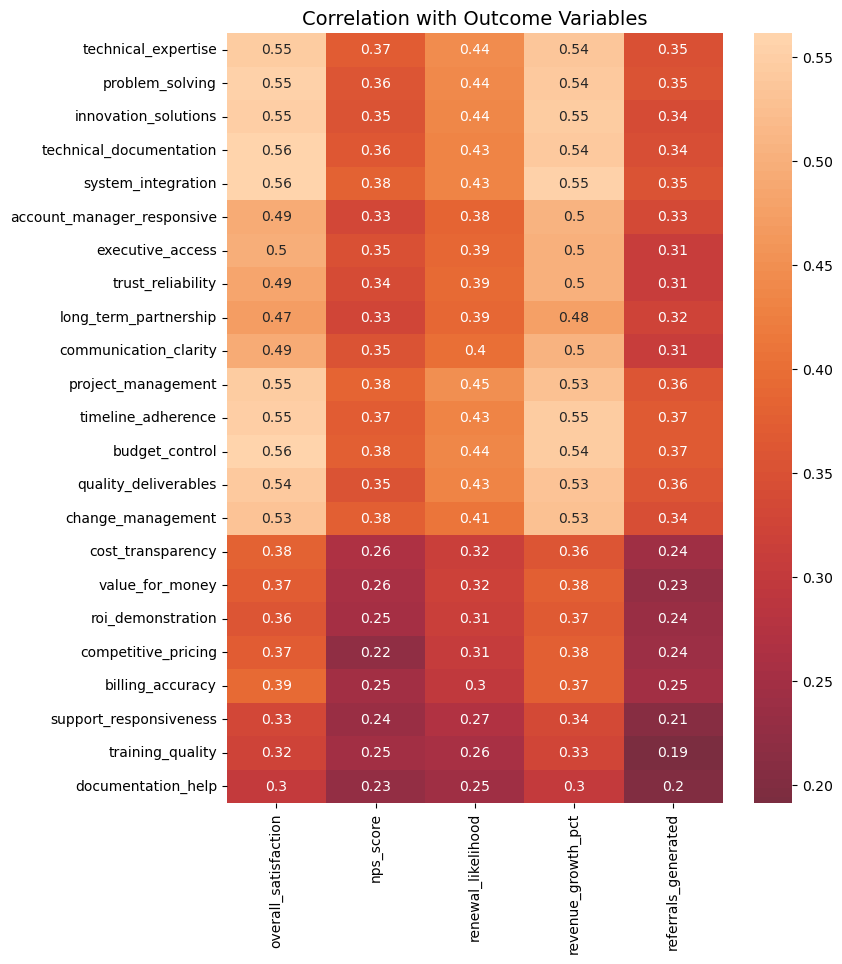

In [11]:
# Matriz de correlación entre variables de satisfacción con respecto a las de outcome
corr_outcomes = df[satisfaction_vars + outcome_vars].corr()[outcome_vars].iloc[:-5]

plt.figure(figsize=(8,10))
sns.heatmap(corr_outcomes, annot=True, center=0)
plt.title("Correlation with Outcome Variables", fontsize=14)
plt.show()


Se observa que todas las variables influyen en el score general de satisfacción, aunque las variables que tienen una mayor correlación son las de `technical_expertise`, `problem_solving`, `innovation_solutions`,
`technical_documentation`, `system_integration`,
`account_manager_responsive`, `executive_access`, `trust_reliability`,
`long_term_partnership` `communication_clarity`.
`project_management`, `timeline_adherence`, `budget_control`, `quality_deliverables` y `change_management`. Dicho de otra manera, las variables que anteriormente se agruparon, como innovación técnica, gestión de relaciones y comunicación y gestión de proyectos y calidad, son las que más correlación tienen con la opinión. Lo que sugiere que en la opinión de los clientes influye más el tipo de servicio que reciben, los resultados que les ofrecen y la comunicación con la que los atienden.

Aunado a esto, los resultados para las variables de `nps_score`, `revenue_growth_pct` y `referrals_generated`, también tienen correlaciones por arriba del umbral de 0.3. De manera similar a la opinión general, las variables con coeficientes más altos son las mismas. Lo que es relevante, ya que no solamente es el hecho de que estas variables tienen un impacto en la opinión del cliente, sino que también tienen un efecto en la probabilidad de que la empresa sea recomendada, su número de referencias y el crecimiento de TechnoServe. Por lo tanto, se puede inferir que si se generan estrategias sobre estos tres aspectos, se podría generar una estrategia que ayude a obtener nuevos clientes y eventualmente contribuir al crecimiento de la empresa.

En el caso de la variable `renewal_likelihood`, todas las variables tienen una correlación por arriba del umbral, excepto por aquellas que tienen que ver con él
soporte y excelencia en el servicio.

Por lo tanto, a partir de esta matriz de correlación, se puede inferir que las variables que pueden llegar a tener un impacto en la empresa son aquellas que tienen que ver con las áreas de innovación técnica, gestión de relaciones y comunicación y gestión de proyectos y calidad. Asimismo, a lo largo de esta exploración, se encontró que las variables con menor correlación entre el resto son las de soporte y excelencia en el servicio, lo que sugiere que estas variables no tienen una influencia significativa en la opinión del cliente.


## Resumen de características y patrones


La base de datos cuenta con algunos valores nulos en ciertas variables, como en account_manager_responsive. De igual manera, se observó que existen tres tipos de variable, los cuales son del tipo flotante, numérico y objeto.


Posterior a esto, se realizó una exploración de los datos para encontrar características específicas de los datos y patrones. Para ello, se realizó un análisis de correlaciones, donde este reveló que se pueden realizar agrupamientos entre las variables de satisfacción y sus áreas correspondientes en la empresa, destacando tres bloques con correlación superiores al 0.5: innovación técnica y resolución de problemas, gestión de relaciones y comunicación y gestión de proyectos de calidad.


También se identificó un grupo económico con correlaciones moderadas mayores al 0.3, relacionando con transparencia financiera. En contraste, las variables de soporte y servicio, mostraron coeficientes por debajo del umbral. Al agrupar las variables por área y calcular sus promedios, se observó que cada una de las áreas tiene correlaciones entre sí, incluso la de soporte y servicio, lo que sugiere que la base de datos, puede contener comportamientos ocultos.

Después, se analizó la relación entre cada variable de satisfacción y los outcomes. Las variables con mayor impacto en la opinión del cliente y en los resultados de
`nps_score`, `revenue_growth_pct` y `referrals_generated`, fueron las mismas que se encuentran dentro de las tres áreas con mayor correlación.

En cambio, las variables de soporte y servicio mostraron tener poca influencia en los outomces, lo que sugiere que podrían no ser determinantes en la percepción que el cliente tiene de la empresa.


A partir del análisis de correlación, se identificaron agrupamientos entre las variables de satisfacción que comparten patrones similares y se relacionan entre sí. En este caso, además de haber correlaciones entre variables de la misma área, también existen correlaciones entre diferentes áreas, como Technical Excellence & Innovation y Project Delivery. Por ende, aunque se puede generar un agrupamiento por áreas, se ha identificado, que también existe una correlación entre áreas, lo que sugiere que existen factores latentes que pueden estar influyendo en estos resultados. Es por esto que se necesita el uso de una técnica que ayude a confirmar que es correcto el agrupamiento de estas variables. A continuación se realizará un análisis de factores, para poder transformar este conjunto de datos correlacionados en factores interpretables que expliquen la opinión de los clientes.


## 1.2 Factor Analysis Suitability

Para hacer un análisis de factores, primero se debe de asegurar que los datos son efectivos para este tipo de análisis, ya que de otra forma, la reducción de factores, no estaría mostrando una relación real de la variable.

Para ello, se usarán dos criterios. El primero se denomina el criterio de Kaiser-Meyer-Olkin (KMO), este se enfoca en medir la proporción de varianza entre variables que podrían tener varianza común. En este caso, se evaluará si las variables tienen un puntaje mayor al 0.6. Por otra parte, se hará una evaluación de correlación para determinar si están lo suficientemente correlacionadas, lo cual se intuye que serán, ya que anteriormente se hizo un análisis de correlación.

In [12]:
df_satisf = df[satisfaction_vars]

# Usar fillna para los valores Nan.
df_satisf = df_satisf.fillna(df_satisf.mean())

# Calcular KMO
kmo_all, kmo_model = calculate_kmo(df_satisf)
print('KMO para todo el modelo')
print("KMO Overall:", kmo_model)

# Para todas las vairables
kmo_per_variable,  kmo_model = calculate_kmo(df_satisf)


# Mostrar KMO por variable
kmo_df = pd.DataFrame({
    'Variable': df_satisf.columns,
    'KMO': kmo_per_variable
})
print('=' * 30)
print('KMO por variable')
print(kmo_df)

KMO para todo el modelo
KMO Overall: 0.9587044573499749
KMO por variable
                      Variable       KMO
0          technical_expertise  0.962052
1              problem_solving  0.958966
2         innovation_solutions  0.956548
3      technical_documentation  0.961258
4           system_integration  0.960443
5   account_manager_responsive  0.963200
6             executive_access  0.958958
7            trust_reliability  0.957771
8        long_term_partnership  0.957371
9        communication_clarity  0.962144
10          project_management  0.961947
11          timeline_adherence  0.964632
12              budget_control  0.967172
13        quality_deliverables  0.965212
14           change_management  0.965699
15           cost_transparency  0.941256
16             value_for_money  0.951750
17           roi_demonstration  0.940507
18         competitive_pricing  0.940428
19            billing_accuracy  0.933039
20      support_responsiveness  0.955575
21            training_qu

In [13]:
# Matriz de correlación
# **Correlation Assessment:** Check if variables are sufficiently correlated

corr_matrix = df_satisf.corr().abs()

n_vars = corr_matrix.shape[0]

n_pairs = (n_vars * (n_vars - 1)) / 2

# Contar pares con |r| >= 0.3 (excluyendo la diagonal)
count_high_corr = np.sum(np.triu(corr_matrix.values, k=1) >= 0.3)

# Porcentaje de pares suficientemente correlacionados
percent_high_corr = count_high_corr / n_pairs * 100

print(f"Correlation Assessment: {percent_high_corr}%")

Correlation Assessment: 47.82608695652174%


## Basic Assumptions


En este caso, la base de datos es adecuada para realizar un análisis de factores, ya que su valor de KMO es de 0.95 y su correlación es de 47.82%. Sin mencionar el hecho de que el KMO de todas las variables está por arriba del 0.9, lo que sugiere que las variables tienen una alta correlación entre sí y que es posible identificar valores latentes.

Los patrones iniciales de correlación sugieren la existencia de factores latentes. En este caso, las áreas Technical Excellence & Innovation y Project Delivery & Quality  son las que muestran fuerte correlación entre sí, lo que significa que la innovación tiene que reflejarse en los resultados de los proyectos. El área de Relationship Management & Communication, mostró tener correlaciones moderadas con el resto, lo que podría significar que la comunicación, influye en la manera en que los clientes perciben el servicio. Por otro lado, las áreas de Value & Financial y Support & Service, tienen correlaciones bajas, lo cual sugiere que la opinión de los clientes respecto al servicio, no suele tener un impacto por estos factores. Por ende, basado en los patrones iniciales, se puede observar que existen ciertos factores que tienen que ver con la técnica e innovación, gestión de proyectos y la comunicación, los cuales se pueden relacionar con la satisfacción general del cliente.

# Part 2 Factor Extraction and Determination

Una vez que se comprobó que el análisis de factores puede ser utilizado dentro de esta base de datos, lo siguiente es extraer los factores latentes necesarios.

## 2.1 Determining Number of Factors
Primero será necesario determinar el número de factores al utilizar el criterio de Kaiser, donde solo se incluyen a los eigenvalores que son mayores a 1. Después, se deberá de hacer un Scree Plot para evaluar la cantidad de factores, antes que se doble el "hombro" de la gráfica. Asimismo, se hará un análisis de la varianza cumulativa explicada para poder definir el número de factores que se utilizarán.

In [14]:
#- **Kaiser Criterion:** Eigenvalues > 1.0
#- **Scree Plot:** Visual identification of "elbow"
#- **Variance Explained:** Cumulative variance analysis

pca = PCA()
pca.fit(df_satisf)
eigenvalues = pca.explained_variance_
cumvar = pca.explained_variance_ratio_.cumsum()

# Criterio de Kaiser eigenvalores > 1.0
n_factors = sum(eigenvalues > 1)


print(f"Eigenvalues: {np.round(eigenvalues, 3)}")
print(len(eigenvalues))
print(f"Número de factores: {n_factors}")

Eigenvalues: [8.262 1.687 1.361 1.153 1.035 0.734 0.722 0.618 0.597 0.578 0.533 0.467
 0.441 0.437 0.434 0.392 0.385 0.38  0.36  0.346 0.335 0.316 0.313]
23
Número de factores: 5


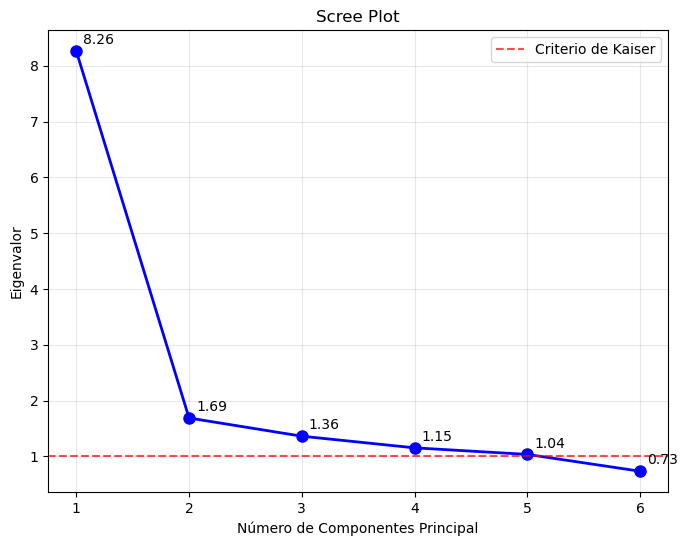

In [15]:
# Scree Plot
plt.figure(figsize=(8, 6))
subset = eigenvalues[:6]
plt.plot(range(1, len(subset) + 1), subset, "bo-", linewidth=2, markersize=8)
plt.axhline(y=1, color="red", linestyle="--", alpha=0.7, label="Criterio de Kaiser")
plt.title("Scree Plot")
plt.xlabel("Número de Componentes Principal")
plt.ylabel("Eigenvalor")
plt.grid(True, alpha=0.3)
plt.legend()

for i, eigenval in enumerate(subset, 1):
    plt.annotate(
        f"{eigenval:.2f}",
        (i, eigenval),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.show()
plt.show()

In [16]:
# Variance Explained: Cumulative variance analysis

variance_threshold = 0.8
n_cumvar = np.argmax(cumvar >= variance_threshold) + 1
print(
    f"Cumulative Variance Threshold ({variance_threshold*100:.0f}%): Retain {n_cumvar} components"
)

variance_threshold = 0.6
n_cumvar = np.argmax(cumvar >= variance_threshold) + 1
print(
    f"Cumulative Variance Threshold ({variance_threshold*100:.0f}%): Retain {n_cumvar} components"
)

Cumulative Variance Threshold (80%): Retain 12 components
Cumulative Variance Threshold (60%): Retain 5 components


Usando el análisis cumulativo de la varianza explicada, se puede observar que se necesitarían 12 componentes para explicar el 80% de la varianza. Por otro lado, para obtener el 60% de la varianza se necesitan 5 componentes. Asimismo, a partir de los resultados del criterio de Kaiser y de la gráfica scree, se puede observar que con 5 factores es suficiente para interpretar los resultados.

Por ende, los criterios coinciden en que el número de factores que se requiere son 5 para poder explicar el 60% de la varianza. En este caso, se opta por no tomar 12 componentes porque esto significaría que solo habría una reducción del 48%, lo cual puede dificultar la interpretabilidad de los resultados. En cambio, con 5 factores la reducción alcanza aproximadamente un 78%, facilitando un análisis más claro.

## 2.2 Factor Extraction and Rotation

Una vez que se definió que el número de factores será 5, ahora se deberá de aplicar la técnica de análisis de factores. No obstante, para hacer esto, será necesario evaluar los resultados que se generan a partir de una rotación varimax y una promax y después de determinar la que se debe de utilizar.

In [17]:
# Utilizar Varimax
fa_rotated = FactorAnalyzer(n_factors=5, rotation="varimax", method="principal")
fa_rotated.fit(df_satisf)

# Obtener las cargas rotadas
loadings_rotated = fa_rotated.loadings_

# Crear nombres de factores
factor_names = [f"Factor_{i+1}" for i in range(loadings_rotated.shape[1])]

# Usar nombres de columnas como nombres de variables
variable_names = df_satisf.columns.tolist()

# Crear DataFrame de cargas rotadas
loadings_df = pd.DataFrame(loadings_rotated, columns=factor_names, index=variable_names)

# Mostrar tabla redondeada
print("\nCargas factoriales rotadas (Varimax):")
print(loadings_df.round(3))


Cargas factoriales rotadas (Varimax):
                            Factor_1  Factor_2  Factor_3  Factor_4  Factor_5
technical_expertise            0.756     0.143     0.205     0.248     0.132
problem_solving                0.772     0.132     0.203     0.242     0.123
innovation_solutions           0.781     0.128     0.212     0.225     0.131
technical_documentation        0.759     0.133     0.229     0.236     0.127
system_integration             0.765     0.133     0.235     0.238     0.122
account_manager_responsive     0.207     0.147     0.705     0.192     0.096
executive_access               0.198     0.155     0.718     0.170     0.130
trust_reliability              0.195     0.142     0.726     0.187     0.101
long_term_partnership          0.182     0.112     0.719     0.195     0.133
communication_clarity          0.199     0.153     0.700     0.197     0.147
project_management             0.235     0.214     0.208     0.735     0.106
timeline_adherence             0.260 

/Users/paulinalealmosqueda/anaconda3/envs/IDM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Factor 1**

Las variables con más impacto tienen en el factor 1, son aquellas que se relacionan con el área técnica y de innovación, con valores por arriba del 0.70. Aunque, también es posible observar, que hay un impacto en las variables de gestión de proyectos, con un valor alrededor del 0.24. Además, las variables del área de finanzas y servicios tienen una influencia menor en este factor. Por lo tanto, al tener cargas positivas para todas las variables, se puede decir que estas son clientes en los que cada variable influye en su opinión, aunque principalmente le dan importancia a la cuestión técnica, innovación y a la gestión de clientes. Es decir que estos clientes buscan que tener soluciones de calidad y que estén sustentadas por experiencia y habilidad por resolver problemas, es decir, se buscan soluciones expertas y confiables.

**Factor 2**

En este caso, las variables con cargas más altas pertenecen al área de finanzas, con valores por arriba del 0.60. También se tienen variables con valores de 0.2, son las de gestión de proyectos, aunque solo son las siguientes variables: `project_management`, `timeline_adherence`, , `quality_deliverables` y `change_management`. Por ende, se puede decir que en este factor, hay clientes a los que les importa más tener precios justos y transparencia en el costo de los productos, aunque le siguen dando valor moderado a la calidad que se les ofrece. Por lo que estos clientes se caracterizan por interesarse en las utilidades que puedan llegar a generar a partir de los servicios que se les otorgan, donde tener precios bajos y competitivos, es una prioridad.

**Factor 3**

Las variables con cargas más altas son las de área de relaciones y comunicación, con valores de alrededor del 0.7. De igual manera, las áreas de innovación y técnica, y gestión de proyectos de calidad, tienen pesos del 0.2. Por lo tanto, se intuye que estos clientes se interesan más por la claridad que se les ofrece durante el servicio y la gestión que hay durante el proceso, ya que se enfocan más en tener una relación de confianza y comunicación. Aunque, también se interesan por seguir teniendo proyectos de calidad y que las respuestas sean hechas mediante experiencia.

**Factor 4**

La carga es más alta en las variables relacionadas con la gestión de proyectos de calidad.

**Factor 5**

El factor 5, tiene más carga en las variables, de soporte y servicios de excelencia, por lo que estos clientes tienden a buscar que la empresa ofrezca apoyo cuando se necesita, que se documente la información y que se den entrenamientos de calidad.

A continuación, se hará utilizará el método de promax, para evaluar si este método es más adecuado para el problema. En este caso, las interpretaciones podrían cambiar, si se observa que las variables tienen correlación entre sí.

In [18]:
# Utilizar Promax
fa_rotated = FactorAnalyzer(n_factors=5, rotation="promax", method="principal")
fa_rotated.fit(df_satisf)

# Obtener las cargas rotadas
loadings_rotated = fa_rotated.loadings_

# Crear nombres de factores
factor_names = [f"Factor_{i+1}" for i in range(loadings_rotated.shape[1])]

# Usar nombres de columnas como nombres de variables
variable_names = df_satisf.columns.tolist()

# Crear DataFrame de cargas rotadas
loadings_df = pd.DataFrame(loadings_rotated, columns=factor_names, index=variable_names)

# Mostrar tabla redondeada
print("\nCargas factoriales rotadas (Promax):")
print(loadings_df.round(3))



Cargas factoriales rotadas (Promax):
                            Factor_1  Factor_2  Factor_3  Factor_4  Factor_5
technical_expertise            0.825     0.008    -0.010     0.030     0.005
problem_solving                0.851    -0.003    -0.012     0.020    -0.004
innovation_solutions           0.865    -0.007    -0.000    -0.007     0.003
technical_documentation        0.830    -0.004     0.024     0.010    -0.002
system_integration             0.835    -0.005     0.030     0.010    -0.009
account_manager_responsive     0.023     0.009     0.768     0.010    -0.027
executive_access               0.010     0.020     0.785    -0.024     0.011
trust_reliability              0.004     0.002     0.797     0.003    -0.022
long_term_partnership         -0.016    -0.035     0.789     0.023     0.017
communication_clarity          0.006     0.011     0.754     0.015     0.030
project_management            -0.007     0.019    -0.005     0.831     0.002
timeline_adherence             0.032  

/Users/paulinalealmosqueda/anaconda3/envs/IDM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Factor 1**

Al igual que en el caso anterior, las variables que influyen más son las del área de innovación y habilidades técnicas. Aunque, a diferencia del modelo con rotación Varimax, aquí se observa que las variables de gestión de proyectos, presentan cargas ligeramente negativas o cercanas a cero, lo que indica una asociación débil o nula con esta componente. Por lo tanto, estos clientes priorizan soluciones expertas, fundamentadas y técnicamente sólidas.

**Factor 2**

Las variables de mayor influencia positiva, siguen siendo aquellas relacionadas con el área de finanzas. Además, se observan cargas negativas en variables como: `problem_solving`, `innovation_solutions` `technical_documentation`, `system_integration`, `long_term_partnership`, `budget_control`,  `training_quality` y `documentation_help`. No obstante, estas cargas son cercanas a cero, lo que indica una contribución baja al factor. Por ende, este factor representa a clientes que valoran la eficiencia económica y el retorno financiero.

**Factor 3**

Este factor se relaciona con el cliente y la comunicación que se le da durante el servicio. Por lo tanto, la opinión del cliente está principalmente influenciada por la calidad del trato, la confianza y la claridad durante el servicio.

**Factor 4**

La carga más alta en este factor, está en las variables de gestión y calidad de proyectos.

**Factor 5**

Las variables con mayor carga en este factor corresponden al área de soporte técnico y servicios de excelencia, lo que indica que estos clientes valoran el acompañamiento, la capacitación y la documentación técnica.

Al comparar los resultados entre Varimax y Promax, se observa que ambas soluciones presentan resultados similares. Las correlaciones entre factores en el modelo de Promax resultan mínimas y no aportan de manera sustancial a la interpretación del modelo. Por ello, se opta por mantener la rotación de Varimax, ya que proporciona una estructura clara y se puede obtener una interpretación de manera más sencilla.


**Interpretabilidad de factores**

Una vez que se realizó el análisis por factores mediante los modelos de Varimax y Promax, fue posible distinguir cada uno con la opinión que los clientes priorizaron. En este sentido, se encontró que cada factor se relaciona con las opiniones que tuvieron en cada una de las áreas de servicio. Por lo que se llegó a la conclusión de que los factores se pueden interpretar de la siguiente manera:

- Factor 1: Technical Excellence & Innovation
- Factor 2: Value & Financial Transparency
- Factor 3: Relationship Management & Communication
- Factor 4: Project Delivery & Quality
- Factor 5: Support & Service Excellence

En este sentido, ya que todos los factores tienen una relación con una área en particular, se concluye que el número de factores que mejor representan a la base de datos es 5. En términos de negocios, se concluye que cada factor representa la calificación de satisfacción de los clientes dependiendo del área de servicio. Se observa que el factor 1, tiene una relación con la experiencia técnica y la habilidad de resolver problemas al momento de dar servicio. El factor 2, se relaciona más con los precios y la transparencia que hay sobre ellos. El factor 3, se relaciona más con el desempeño que hay en cuanto a la comunicación, la claridad y la confianza que el cliente tiene. El factor 4, tiene que ver con la calidad de la entrega de los proyectos. Por último, el factor 5, se relaciona más con el trato que hay durante el servicio y la calidad de ayuda que se otorga.


# Part 3

Anteriormente, fue posible encontrar los factores e interpretar de cierta manera la opinión de los clientes basada en las cargas de cada resultado. Sin embargo, para poder mostrar de manera más clara, aquellas variables que tienen cargas más altas en cada factor, se hará una búsqueda para desplegar únicamente a las variables que tuvieron una carga mayor a |0.4| por factor.

In [19]:
# --- PASO 3.1: INTERPRETACIÓN DE FACTORES ---

# Realizar el Análisis Factorial con 5 factores y rotación Varimax
fa = FactorAnalyzer(n_factors=5, rotation="varimax", method="principal")
fa.fit(df_satisf)

# Obtener la matriz de cargas factoriales
loadings_df = pd.DataFrame(fa.loadings_, index=df_satisf.columns, columns=[f'Factor {i+1}' for i in range(5)])

# Función para resaltar cargas altas
def highlight_high_loadings(val):
    color = 'yellow' if abs(val) > 0.4 else ''
    return f'background-color: {color}'

# Mostrar la tabla de cargas resaltada para una fácil interpretación
print("Matriz de Cargas Factoriales (Rotación Varimax)")
display(loadings_df.style.applymap(highlight_high_loadings).format("{:.3f}"))


/Users/paulinalealmosqueda/anaconda3/envs/IDM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Matriz de Cargas Factoriales (Rotación Varimax)


/var/folders/4z/x0x3cnw55vgc_j0fssxl_9fm0000gn/T/ipykernel_2262/1652076416.py:17: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  display(loadings_df.style.applymap(highlight_high_loadings).format("{:.3f}"))


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
technical_expertise,0.756,0.143,0.205,0.248,0.132
problem_solving,0.772,0.132,0.203,0.242,0.123
innovation_solutions,0.781,0.128,0.212,0.225,0.131
technical_documentation,0.759,0.133,0.229,0.236,0.127
system_integration,0.765,0.133,0.235,0.238,0.122
account_manager_responsive,0.207,0.147,0.705,0.192,0.096
executive_access,0.198,0.155,0.718,0.170,0.130
trust_reliability,0.195,0.142,0.726,0.187,0.101
long_term_partnership,0.182,0.112,0.719,0.195,0.133
communication_clarity,0.199,0.153,0.700,0.197,0.147


In [20]:
comunalidades = pd.DataFrame(fa.get_communalities(), index=df_satisf.columns, columns=['h2'])
print("Variables con comunalidades bajas (<0.4):")
# Print true si hay comunalidades < 0.4
print(comunalidades['h2'] < 0.4)

Variables con comunalidades bajas (<0.4):
technical_expertise           False
problem_solving               False
innovation_solutions          False
technical_documentation       False
system_integration            False
account_manager_responsive    False
executive_access              False
trust_reliability             False
long_term_partnership         False
communication_clarity         False
project_management            False
timeline_adherence            False
budget_control                False
quality_deliverables          False
change_management             False
cost_transparency             False
value_for_money               False
roi_demonstration             False
competitive_pricing           False
billing_accuracy              False
support_responsiveness        False
training_quality              False
documentation_help            False
Name: h2, dtype: bool


Los resultados ofrecen una clara separación de factores x originales para cada factor, el cual se clasificará de la siguiente manera:


###Factor 1: Excelencia Técnica e Innovación
Este grupo reúne variables como
technical_expertise, problem_solving, innovation_solutions,
technical_documentation y system_integration. Refleja cómo los clientes perciben la competencia técnica y el nivel de innovación del proyecto.

###Factor 2: Valor Financiero y Transparencia
Incluye variables como value_for_money, competitive_pricing, roi_demonstration, cost_transparency y billing_accuracy. Este factor captura la percepción del cliente sobre el valor económico recibido, la claridad en precios y el retorno de inversión. Básicamente, si sienten que lo que pagan vale la pena.

###Factor 3: Relación Estratégica y Comunicación
Agrupa long_term_partnership, trust_reliability, account_manager_responsive, communication_clarity y executive_access. Aquí se mide la calidad de la relación humana y la confianza construida con el cliente. Va más allá de lo técnico o financiero: se trata de cercanía, claridad y acceso estratégico.

###Factor 4: Gestión de Proyectos y Calidad Operativa
Formado por project_management, timeline_adherence, budget_control,quality_deliverables y change_management. Este factor representa la capacidad de la empresa para ofrecer proyectos de calidad.  Es clave para facilitar el uso y mantenimiento de lo entregado.

###Factor 5: Soporte y Servicio
Incluye support_responsiveness, training_quality y documentation_help. Refleja la agilidad para responder a problemas, adaptarse a cambios y ofrecer capacitación efectiva. Es el soporte que se da después de implementar la solución.

Estos factores latentes hacen completo sentido en su conformación y consolidación y pueden ser de gran utilidad para agrupar varias características y hacer más clara su comprensión. Pero se necesita de un análisis en cada uno de los clientes para poder entender el comportamiento que estos factores pueden tener y también predecir los resultados que se pueden obtener en las variables predictoras.


De igual manera, se observó que no hay comunalidades menores al 0.4

In [21]:
# --- PASO 3.2: PERSPECTIVAS DE NEGOCIO ---

# Obtener los factor scores para cada cliente
factor_scores = pd.DataFrame(fa.transform(df_satisf), columns=[
    'F1_Excelencia_Tecnica',
    'F2_Valor_Financiero',
    'F3_Relacion_Estrategica',
    'F4_Calidad_Proyectos',
    'F5_Gestion_Soporte'
])

# Agregar custumer_id
factor_scores['customer_id'] = df['customer_id'].values


# Crear columna de factores dominantes por cada cliente.
# Si el factor x domina en el cliente, entonces ese es el dominante.
factor_scores['factor_dominante'] = factor_scores[
    ['F1_Excelencia_Tecnica', 'F2_Valor_Financiero', 'F3_Relacion_Estrategica',
     'F4_Calidad_Proyectos', 'F5_Gestion_Soporte']
].idxmax(axis=1)

cols = factor_scores.columns.tolist()
cols.insert(0, cols.pop(cols.index('customer_id')))
factor_scores = factor_scores[cols]

# Desplegar factor scoeres por cliente y mostrar el más dominante.
factor_scores.head()

/Users/paulinalealmosqueda/anaconda3/envs/IDM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,customer_id,F1_Excelencia_Tecnica,F2_Valor_Financiero,F3_Relacion_Estrategica,F4_Calidad_Proyectos,F5_Gestion_Soporte,factor_dominante
0,CUST_001,0.296625,1.978395,1.128628,-0.408424,-1.145068,F2_Valor_Financiero
1,CUST_002,-0.616702,-1.252949,1.839892,0.305010,-1.167629,F3_Relacion_Estrategica
2,CUST_003,-0.723944,-0.910407,0.388913,-0.165875,-0.861031,F3_Relacion_Estrategica
3,CUST_004,0.047927,-0.387848,-1.956654,0.172313,-1.190252,F4_Calidad_Proyectos
4,CUST_005,0.827486,-0.488369,1.074682,0.475787,-0.035478,F3_Relacion_Estrategica


In [22]:
descriptivos = factor_scores.drop(columns=['customer_id', 'factor_dominante']).describe().T
descriptivos['rango'] = descriptivos['max'] - descriptivos['min']
descriptivos

,count,mean,std,min,25%,50%,75%,max,rango
F1_Excelencia_Tecnica,3400.0,5.851528e-17,1.000146,-3.402989,-0.675352,0.016536,0.673671,3.352907,6.755896
F2_Valor_Financiero,3400.0,5.851528e-17,1.000145,-3.965953,-0.657881,-0.009117,0.699877,3.493860,7.459813
F3_Relacion_Estrategica,3400.0,2.340611e-16,1.000152,-3.368237,-0.663207,-0.002420,0.688727,3.316266,6.684502
F4_Calidad_Proyectos,3400.0,-2.674984e-16,1.000138,-3.218527,-0.687258,0.016903,0.677299,3.210848,6.429375
F5_Gestion_Soporte,3400.0,2.215221e-16,1.000155,-3.641745,-0.658571,-0.004610,0.685050,3.842275,7.484020


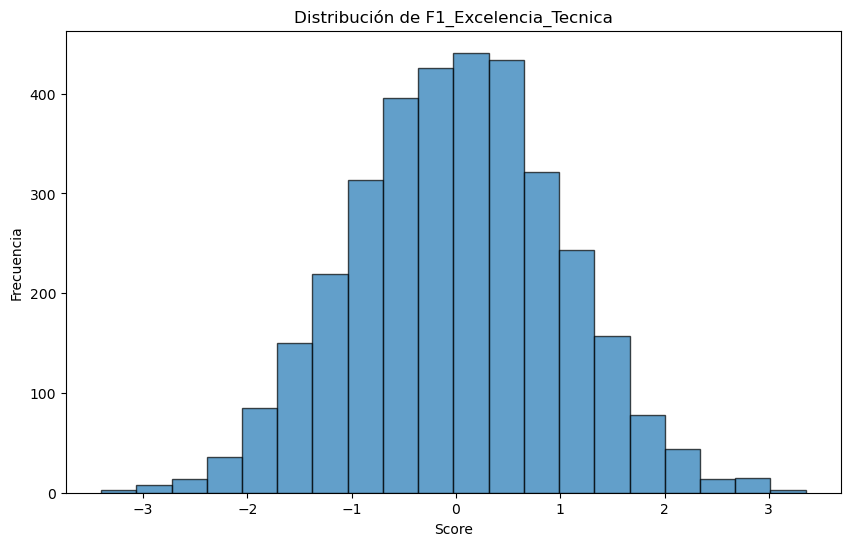

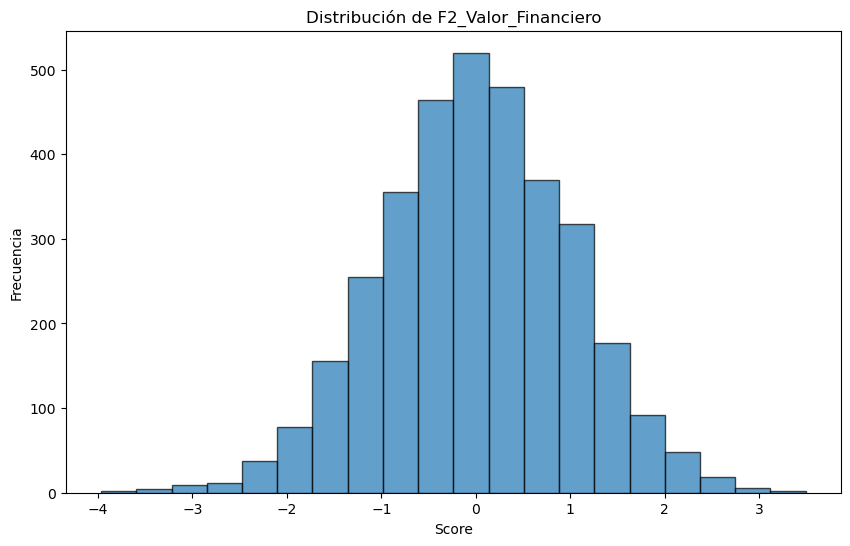

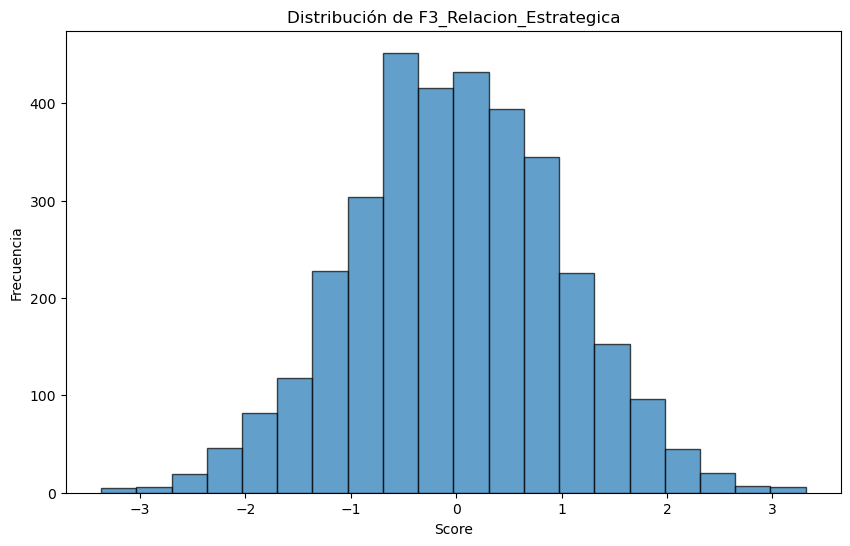

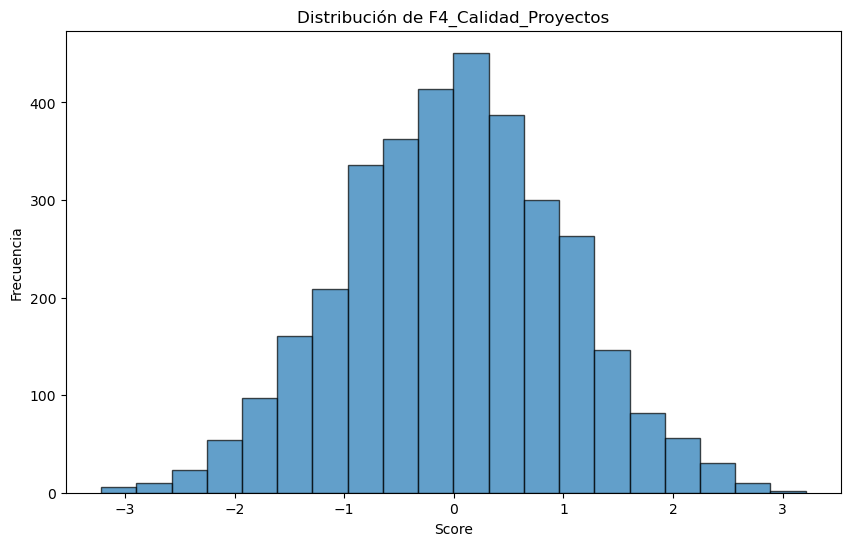

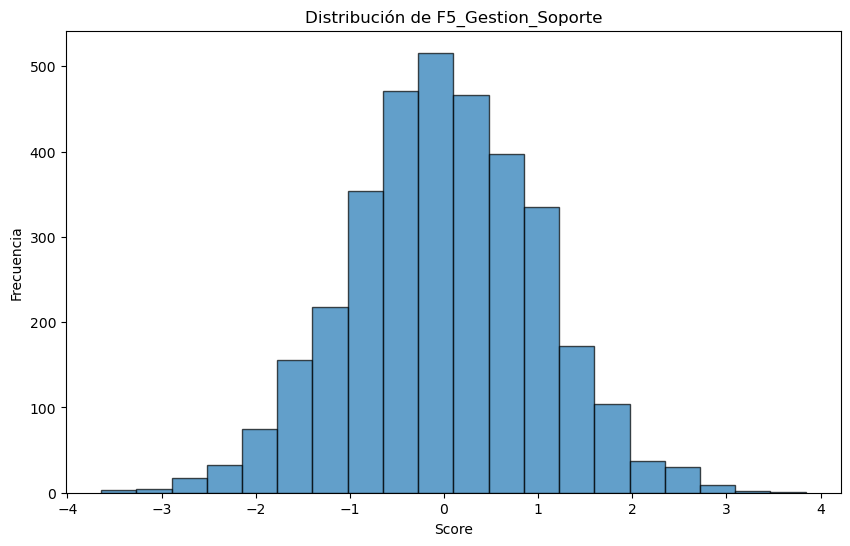

In [23]:
for col in factor_scores:
    # drop customer_id y factor dominante
    if col not in ['customer_id', 'factor_dominante']:
      plt.figure(figsize=(10, 6))
      plt.hist(factor_scores[col], bins=20, alpha=0.7, edgecolor='black')
      plt.title(f'Distribución de {col}')
      plt.xlabel('Score')
      plt.ylabel('Frecuencia')
      plt.show()

In [24]:
# Contar cantidad de clientes por factor dominante
factor_dominante_counts = factor_scores['factor_dominante'].value_counts().sort_values(ascending=False)
print("Cantidad de clientes por factor dominante:")
print(factor_dominante_counts)


Cantidad de clientes por factor dominante:
factor_dominante
F3_Relacion_Estrategica    698
F4_Calidad_Proyectos       685
F1_Excelencia_Tecnica      677
F2_Valor_Financiero        676
F5_Gestion_Soporte         664
Name: count, dtype: int64


Se puede observar cómo es que la distribución es la distribución de los clientes y que los que más frecuentes son el 3, 4 y el 1. Consecuentemente, se generará una visualización interactiva, para desplegar a los clientes que tuvieron un score bajo y alto en cada uno de los factores.

In [25]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

# Calcular percentiles 10% y 90%
percentiles = factor_scores.drop(columns=['customer_id','factor_dominante']).quantile([0.1,0.9])
df_outcomes = df[['overall_satisfaction', 'nps_score', 'renewal_likelihood', 'revenue_growth_pct', 'referrals_generated']]

# Función para actualizar tabla y gráfico según factor seleccionado
def mostrar_extremos(factor):
    bajos = factor_scores[factor_scores[factor] <= percentiles.loc[0.1, factor]]
    altos = factor_scores[factor_scores[factor] >= percentiles.loc[0.9, factor]]

    # Outcomes promedio
    bajos_outcomes = df_outcomes[df['customer_id'].isin(bajos['customer_id'])].mean()
    altos_outcomes = df_outcomes[df['customer_id'].isin(altos['customer_id'])].mean()

    print(f"Factor seleccionado: {factor}")
    print(f"Clientes con score bajo (10%): {len(bajos)}")
    display(bajos[['customer_id', factor]].head())

    print(f"Clientes con score alto (90%): {len(altos)}")
    display(altos[['customer_id', factor]].head())


# Crear dropdown para seleccionar factor
dropdown = widgets.Dropdown(
    options=[col for col in factor_scores.columns if col not in ['customer_id','factor_dominante']],
    description='Factor:'
)

widgets.interact(mostrar_extremos, factor=dropdown)


interactive(children=(Dropdown(description='Factor:', options=('F1_Excelencia_Tecnica', 'F2_Valor_Financiero',…

<function __main__.mostrar_extremos(factor)>

Utilizando esta visualización interactiva, se pueden observar a los 5 clientes que tuvieron los factores de carga más bajos y altos. A partir de esto, se pueden hacer estrategias personalizadas, ya que se puede observar a cada cliente por factor latente. Cabe mencionar que esta segmentación por cliente está hecha a partir de percentiles, donde se calculan los scores de los factores y se genera un umbral para definir el 10% de clientes con un score bajo y el 10% con un score alto.

Después de tener un dataframe con el factor scores de cada cliente, lo siguiente es utilizar un modelo de regresión lineal para predecir las variables predictoras.

--- ANÁLISIS DE REGRESIÓN LINEAL: FACTORES VS. RESULTADOS DE NEGOCIO ---

--- Modelo para predecir: 'overall_satisfaction' ---
R-cuadrado para 'overall_satisfaction': 0.60
Interpretación: Los 5 factores explican el 60.24% de la varianza en 'overall_satisfaction'.

Impacto de cada factor (Coeficientes del modelo):


,Coeficiente
F1_Excelencia_Tecnica,0.330654
F4_Calidad_Proyectos,0.309562
F3_Relacion_Estrategica,0.300486
F2_Valor_Financiero,0.268467
F5_Gestion_Soporte,0.187755




--- Modelo para predecir: 'nps_score' ---
R-cuadrado para 'nps_score': 0.28
Interpretación: Los 5 factores explican el 28.24% de la varianza en 'nps_score'.

Impacto de cada factor (Coeficientes del modelo):


,Coeficiente
F3_Relacion_Estrategica,0.465986
F4_Calidad_Proyectos,0.465170
F1_Excelencia_Tecnica,0.446753
F2_Valor_Financiero,0.377761
F5_Gestion_Soporte,0.340999




--- Modelo para predecir: 'renewal_likelihood' ---
R-cuadrado para 'renewal_likelihood': 0.39
Interpretación: Los 5 factores explican el 38.77% de la varianza en 'renewal_likelihood'.

Impacto de cada factor (Coeficientes del modelo):


,Coeficiente
F1_Excelencia_Tecnica,0.240075
F3_Relacion_Estrategica,0.224840
F4_Calidad_Proyectos,0.223413
F2_Valor_Financiero,0.213400
F5_Gestion_Soporte,0.145668




--- Modelo para predecir: 'revenue_growth_pct' ---
R-cuadrado para 'revenue_growth_pct': 0.60
Interpretación: Los 5 factores explican el 59.58% de la varianza en 'revenue_growth_pct'.

Impacto de cada factor (Coeficientes del modelo):


,Coeficiente
F1_Excelencia_Tecnica,3.251288
F3_Relacion_Estrategica,3.232369
F4_Calidad_Proyectos,3.030264
F2_Valor_Financiero,2.681798
F5_Gestion_Soporte,1.946522




--- Modelo para predecir: 'referrals_generated' ---
R-cuadrado para 'referrals_generated': 0.25
Interpretación: Los 5 factores explican el 24.82% de la varianza en 'referrals_generated'.

Impacto de cada factor (Coeficientes del modelo):


,Coeficiente
F4_Calidad_Proyectos,0.394091
F1_Excelencia_Tecnica,0.367755
F3_Relacion_Estrategica,0.365258
F2_Valor_Financiero,0.311694
F5_Gestion_Soporte,0.212529


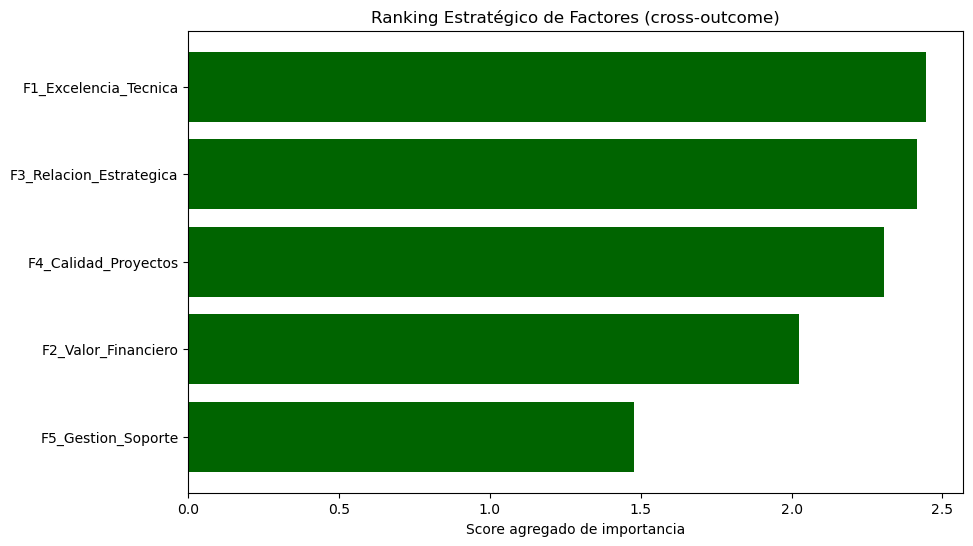

In [26]:
# Utilizar los factor scores para predecir el comportamiento de las variables outcome

X = factor_scores.drop(columns=['customer_id', 'factor_dominante'])
df_outcomes = df[['overall_satisfaction', 'nps_score', 'renewal_likelihood', 'revenue_growth_pct', 'referrals_generated']]

outcome_targets = df_outcomes

coeficientes = {}

print("--- ANÁLISIS DE REGRESIÓN LINEAL: FACTORES VS. RESULTADOS DE NEGOCIO ---\n")

# Utilizar regresión lineal para la predicción
for outcome in outcome_targets:
  print(f"--- Modelo para predecir: '{outcome}' ---")

  y = df_outcomes[outcome]
  model = LinearRegression()
  model.fit(X, y)
  coeficientes[outcome] = pd.Series(model.coef_, index=X.columns)

  # Evaluar valor de r**2 y sus coeficientes
  r2 = model.score(X, y)
  print(f"R-cuadrado para '{outcome}': {r2:.2f}")
  print(f"Interpretación: Los 5 factores explican el {r2:.2%} de la varianza en '{outcome}'.\n")

  coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coeficiente'])
  coefficients = coefficients.sort_values(by='Coeficiente', ascending=False)
  print("Impacto de cada factor (Coeficientes del modelo):")
  display(coefficients.style.background_gradient(cmap='viridis'))
  print("\n" + "="*60 + "\n")


coef_df = pd.DataFrame(coeficientes)


importance_matrix = pd.DataFrame(index=X.columns, columns=df_outcomes.columns)
for outcome in df_outcomes.columns:
   y = df_outcomes[outcome]
   model = LinearRegression().fit(X, y)
   importance_matrix[outcome] = model.coef_ * model.score(X, y)


importance_matrix['score_agregado'] = importance_matrix.abs().sum(axis=1)
importance_matrix_sorted = importance_matrix.sort_values('score_agregado', ascending=True)


# Gráfico de barras

plt.figure(figsize=(10,6))
plt.barh(importance_matrix_sorted.index, importance_matrix_sorted['score_agregado'], color='darkgreen')
plt.xlabel('Score agregado de importancia')
plt.title('Ranking Estratégico de Factores (cross-outcome)')
plt.show()



Se puede observar que tanto en las medias de correlaciones entre factores y outcome variables, como en la magnitud de coeficientes, el factor más importante es el relacionado con la Excelencia Técnica, dominando en los análisis de regresión con más varianza explicada con respecto a los modelos y siendo el factor latente con la media más grande tomando en cuenta los outcomes de salida. Seguido directamente por los factores 3 y 4 relacionados con Relación Estratégica y Excelencia Técnica.


In [27]:
# Evaluar la correlación que los outcomes tienen
# Correlación entre factores y outcomes
df_analysis = pd.concat([X, df_outcomes], axis=1)

# Calcular la matriz de correlación entre los scores y los resultados
correlation_matrix = df_analysis.corr()
business_impact_corr = correlation_matrix.loc[X.columns, df_outcomes.columns]

# Promedio absoluto para cada factor
business_impact_corr['impacto_medio_abs'] = business_impact_corr.abs().mean(axis=1)

# Ranking de factores de mayor a menor impacto
factor_ranking = business_impact_corr.sort_values(by='impacto_medio_abs', ascending=False)
display(factor_ranking.style.background_gradient(cmap='viridis').format("{:.2f}"))



,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated,impacto_medio_abs
F1_Excelencia_Tecnica,0.40,0.25,0.32,0.39,0.24,0.32
F4_Calidad_Proyectos,0.38,0.26,0.29,0.36,0.26,0.31
F3_Relacion_Estrategica,0.37,0.26,0.30,0.39,0.24,0.31
F2_Valor_Financiero,0.33,0.21,0.28,0.32,0.21,0.27
F5_Gestion_Soporte,0.23,0.19,0.19,0.23,0.14,0.20


Teniendo esta matriz de correlación, se puede hacer un análisis enfocado en el impacto que cada factor tiene en las variables predictoras.

**Factor 1**
En este caso, se tiene una correlación del 0.4 con overall_satisfaction y una de 0.39 con el revenue_growth_pct. Asimismo, se tienen coeficientes de correlación del 0.32 con renewal_likelihood e impacto_medio_abs. Por ende, el factor relacionado con innovación y experiencia, se correlaciona más en la calificación general del cliente y el crecimiento de la empresa.

**Factor 2**
Se tiene una correlación del 0.33 con overall_satisfaction y una de 0.32 con revenue_growth_pct. De igual manera, hay un valor de 0.28 y 0.27 en renewal_likelihood e impacto_medio_abs. Es decir, que el valor financiero, también tiene una correlación más alta con las variables de crecimiento y satisfacción.

**Factor 3**
Observando los coeficientes, se encontró que las variables que se correlacionan más son las de overall_satisfaction y revenue_growth_pct. Aunque también hay una correlación del 0.31 y 0.3 con impacto_medio_abs y renewal_likelihood, respectivamente.

**Factor 4**
El factor 4, tiene resultados que siguien el mismo patrón de los anteriores, donde las variables overall_satisfaction y revenue_growth_pct tienen los coreficientes más altos.

**Factor 5**
El factor 5, no tiene correlación alta con ninguna de las variables de outcome.


Por lo tanto, a partir de esto, se puede definir que las variables que se correlacionan más con los factores son overall_satisfaction y revenue_growth_pct. Sin embargo, también es importante, recalcar que el factor 5 de gestión de soporte, no tiene una correlación aceptada con el umbral de 0.3. Esto significa que la gestión de soporte, no tiene un impacto significativo con el desempeño y la opinión de la empresa.

Empero, estos resultados únicamente proporcionan un vistazo general de los factores que tienen más correlación con las variables predictores, pero cabe la posibilidad de que al observar a cada cliente y analizar sus factores dominantes con las variables predictoras, se obtengan resultados diferentes. La razón de esto, es debido a que, se podrá tener una comprensión de las variables correlacionadas con el perfil de clientes en donde, en su opinión, influyó un factor en particular. A continuación se muestra una matriz de correlación mostrando las modificaciones indicadas.

,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
factor_dominante,,,,,
F3_Relacion_Estrategica,4.18,6.26,3.10,6.72,1.64
F1_Excelencia_Tecnica,4.17,6.09,3.08,6.51,1.60
F4_Calidad_Proyectos,4.15,6.20,3.09,6.18,1.67
F2_Valor_Financiero,4.09,6.13,3.07,5.90,1.64
F5_Gestion_Soporte,4.03,6.16,3.00,5.01,1.53


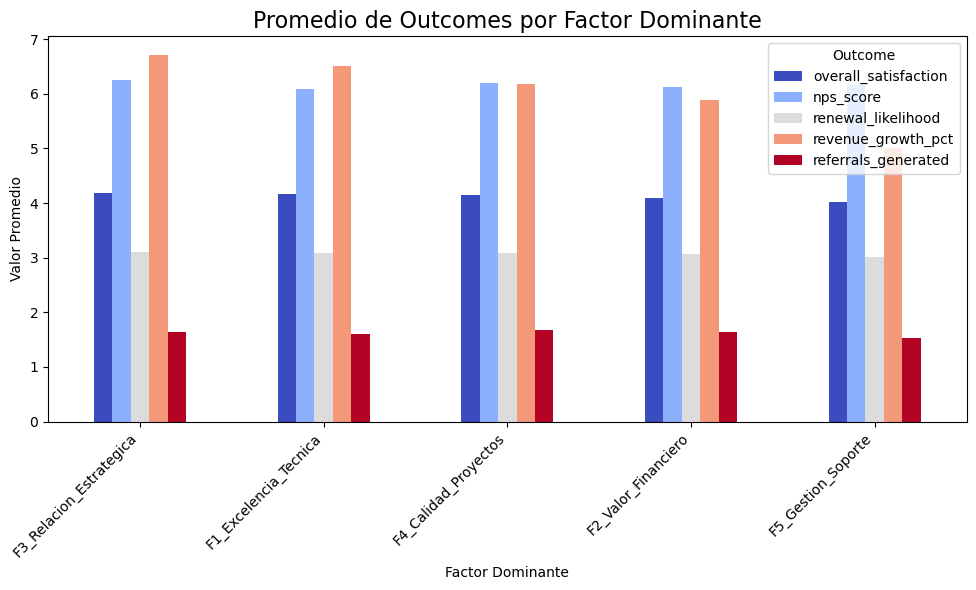

In [28]:
# Promedio de outcomes
df_segmentado = factor_scores.merge(df_outcomes, left_index=True, right_index=True)
impacto_por_segmento = df_segmentado.groupby('factor_dominante')[
    ['overall_satisfaction', 'nps_score', 'renewal_likelihood', 'revenue_growth_pct', 'referrals_generated']
].mean().sort_values('overall_satisfaction', ascending=False)
display(impacto_por_segmento.style.background_gradient(cmap='viridis').format("{:.2f}"))


impacto_por_segmento = impacto_por_segmento.sort_values('overall_satisfaction', ascending=False)

# Plot
impacto_por_segmento.plot(
    kind='bar',
    figsize=(10,6),
    colormap='coolwarm'
)
plt.title('Promedio de Outcomes por Factor Dominante', fontsize=16)
plt.ylabel('Valor Promedio')
plt.xlabel('Factor Dominante')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()



En este caso, se observa, que todos los clientes que tenían un factor dominante, tienen una correlación alta con overall_satisfaction, nps_score y el revenue_growth_pct. Esto quiere decir que, a pesar de que para cada cliente, hubiera un factor que dominara más sobre los otros, aun así la opinión tuvo una correlación más alta con la calificación general, la métrica de recomendación y el crecimiento de ganancias año con año. Es decir, que todos los factores tienen un impacto en determinar si la empresa tendrá buenas recomendaciones y mejorará en sus ganancias.

En particular, observando los coeficientes, se encontró que los factores con una correlación ligeramente más alta, en la variable overall_satisfaction son el 3, 1 y 4. En el caso de la variable nps_score, los coeficientes más altos, fueron para los factores 3, 4 y 5. Asimismo, los factores 3, 1 y 4, son los que tienen coeficientes más altos para renewal_likelihood.

Por lo tanto, los factores que impactan más en la calificación general del cliente, la probabilidad de renovar el contrato y en porcentaje de crecimiento año con año, son aquellos que tienen que ver con la calidad del proyecto que se entrega y el proceso comunicativo y técnico que se tuvo a lo largo del desarrollo de la solución. Por otro lado, el nivel de probabilidad de recomendación es más alto cuando el factor dominante en la opinión de un cliente es la relación estratégica, la entrega de proyectos innovadores y la gestión de soporte en los servicios.

**Hallazgos**

Los hallazgos principales dentro de este análisis son los siguientes.

*   El factor más importante para las variables predictoras es el relacionado con la Excelencia Técnica.
*   Los factores tienen una correlación más alta con las variables overall_satisfaction y revenue_growth_pct.

*  Los factores dominantes de cada cliente, tienen una correlación alta con overall_satisfaction, nps_score y el revenue_growth_pct

*   Cuando en la opinión de una cliente, domina el factor de Excelencia Técnica, Relación Estrátegica y Calidad de Proyectos, suele haber una correlación alta en overall_satisfaction y renewal_likelihood.

*   Cuando su opinión está dominada por los factores de Relación Estrátegica, Calidad de Proyectos y Soporte, hay una correlación con nps_score.

Anteriormente, se utilizó un modelo de regresión para identificar que había tres factores que se deben de priorizar, ya que estos son los que más correlación tienen con las variables predictoras. Estos son: Excelencia Técnica e Innovación, Relación Estratégica y Comunicación y Gestión de Proyectos y Calidad Operativa. Posterior a esto, se hizo un análisis enfocado en los clientes y los factores que dominan más en su opinión. Una vez hecho esto, se encontró que para todas las variables predictoras, excepto por el número de referencias, existe una correlación con todos los factores latentes. Por su parte, también se observó que hay factores que tienen una correlación ligeramente más alta con los outcomes. Por ende, para proponer un plan de acción adecuado para cada tipo de cliente, se implementará una estrategia que esté enfocada en mejorar aspectos de la empresa basados en las variables que tienen una correlación más alta con su opinión. De la misma manera, estas estrategias, estarán centradas en los tres factores que, con el modelo de regresión, se encontró que hay una mayor correlación.


In [29]:
# Tomar desviación estándar de cada factor
std_factors = X.std()

factores_objetivo = ['F1_Excelencia_Tecnica', 'F4_Calidad_Proyectos', 'F3_Relacion_Estrategica']

impactos_esperados = {}

for factor in factores_objetivo:
    incremento = std_factors[factor]  # +1 desviación estándar
    impacto = coef_df.loc[factor] * incremento
    impactos_esperados[factor] = impacto

impactos_df = pd.DataFrame(impactos_esperados).T
impactos_df


,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
F1_Excelencia_Tecnica,0.330702,0.446818,0.240110,3.251763,0.367808
F4_Calidad_Proyectos,0.309605,0.465235,0.223444,3.030682,0.394145
F3_Relacion_Estrategica,0.300531,0.466057,0.224874,3.232859,0.365314


In [30]:
# Utilizar escalas
escalas = {
    'overall_satisfaction': (1, 7), # La escala es de 1 a 7
    'nps_score': (0, 10), # El score es de 0 a 10
    'renewal_likelihood': (1, 5), # 1 = muy bajo, 5 = muy alto
}

mean_values = X.mean()

impactos_pct = impactos_df.copy()

for col in impactos_df.columns:
    if col in escalas and escalas[col] is not None:
        min_val, max_val = escalas[col]
        # Calcular porcentaje de impacto.
        impactos_pct[col] = (impactos_df[col] / (max_val - min_val)) * 100

impactos_pct


,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
F1_Excelencia_Tecnica,5.511705,4.468181,6.002746,3.251763,0.367808
F4_Calidad_Proyectos,5.160079,4.652346,5.586097,3.030682,0.394145
F3_Relacion_Estrategica,5.008853,4.660569,5.621854,3.232859,0.365314


Este cálculo muestra las proyecciones de impacto al calcular la desviación estándar de cada factor y multiplicarlo por el coeficiente del modelo de regresión lineal.


**Estrategias sugeridas**

**Excelencia Técnica**

Los clientes con este factor dominante, tuvieron un coeficiente de correlación alto en overall_satisfaction, revenue_growth_pct, renewal_likelihood. Se propone que la empresa realice prácticas mensuales, donde se generen casos prácticos, simulados diseñados para que los empleados tengan que enfrentar retos y presentar soluciones innovadoras. Durante estas prácticas se les deberá de dar una retroalimentación que esté enfocada en 5 métricas específicas: uso de habilidades técnicas, habilidad para la resolución de problemas, creatividad, documentación clara y comunicación. Por otro lado, se recomienda que durante la gestión de un proyecto con un cliente, se haga una evaluación constante del manejo técnico y de la gestión resolutiva que los consultores están teniendo, esto además de una evaluación, servirá para encontrar nuevas estrategias, que ayuden a mejorar el desempeño de los consultores.

A su vez, considerando la relevancia de la adopción tecnológica, es vital agendar reuniones trimestrales con los clientes clave, lideradas por un consultor senior, con el único propósito de presentar tendencias tecnológicas relevantes para su industria y "roadmaps" de innovación de TechnoServe.

Si se generan estas estrategias, se espera que haya una mejora en overall_satisfaction del 0.33, en renewal_likelihood del 0.24 y revenue_growth_pct del 3.25. Impacto que se puede generar:

* Overall satisfaciont: 5.5%
* Nps score: 4.46%
* Probabilidad de renovación: 6%
* Crecimiento año con año: 3.25%
* Referencias generadas: 0.36 (sin escala)

**Relación Estratégica y Comunicación**

Los coeficientes con mayor correlación en estos factores dominantes, son
overall_satisfaction, nps_score y renewal_likelihood. Esto quiere decir que es de gran importancia para la empresa generar una estrategia que se enfoque en mejorar la comunicación con los clientes, ya que esto puede influir en la renovación de contratos y en la probabilidad de recomendación, lo que podría generar nuevos clientes a futuro. Tener prácticas enfocadas en áreas técnicas es importante, pero si la empresa busca entablar una relación de confianza y respeto con sus clientes, se debe de asegurar de que los Account Managers, cuenten con habilidades comunicativas para poder expresar sus ideas y que sean transparentes con sus clientes. Es por esto que se plantea la recomendación de que las personas que se encarguen de la comunicación del cliente, deben de tener un perfil que demuestre que tengan habilidades comunicativas y una personalidad que les facilitará tener una relación con el cliente. Para ello, se recomienda hacer exámenes psicométricos y asignar este trabajo a la persona que cumpla con un perfil comunicativo.

Asimismo, también se recomienda tener actividades recreativas que motiven a los empleados que no cuentan con estas habilidades, ya que, en caso de que el cliente lo quiera, tendrán que estar preparados para hablar con ellos. En estas actividades recreativas, el enfoque será realizar juegos o actividades para que trabajen en equipo y aprendan a comunicarse en ambientes diferentes a la empresa.

Se espera una mejora en overall_satisfaction de 0.3, nps_score de 0.46 y renewal_likelihood de 0.22.

* Overall satisfaciont: 5%
* Nps score: 4.66%
* Probabilidad de renovación: 5.62%
* Crecimiento año con año: 3.23%
* Referencias generadas: 0.39 (sin escala)

**Gestión de Proyectos y Calidad Operativa**

Al igual que en el caso anterior, los coeficientes con mayor correlación en estos factores dominantes, son
overall_satisfaction, nps_score y renewal_likelihood. En este caso, lo que se recomienda es que antes de comenzar un proyecto, lo primero que se debe de hacer es realizar un plan que esté sujeto a cambios y que tenga un orden establecido para que pueda ser entregado en tiempo y forma. Asimismo, de manera semanal, se debe de hacer una evaluación sobre el progreso del proyecto y los ajustes que se pueden realizar para mejorarlo.

Se espera una mejora en overall_satisfaction de 0.3, nps_score de 0.46 y para renewal_likelihood una mejora de 0.223444.

* Overall satisfaciont: 5.1%
* Nps score: 4.65%
* Probabilidad de renovación: 5.58%
* Crecimiento año con año: 3.03%
* Referencias generadas: 0.39 (sin escala)


# Part 4

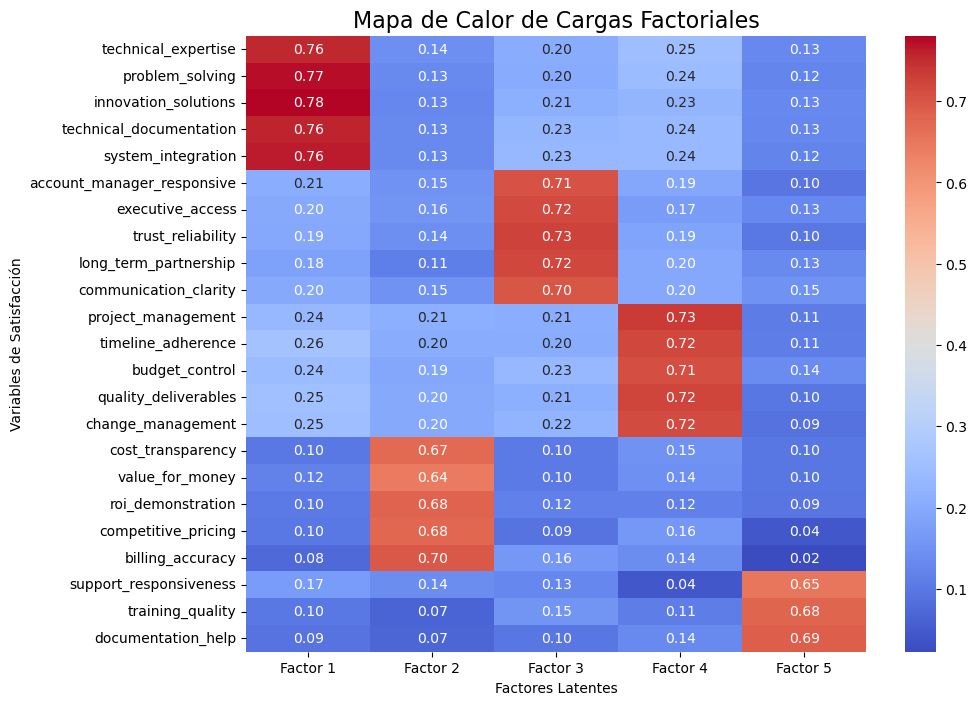

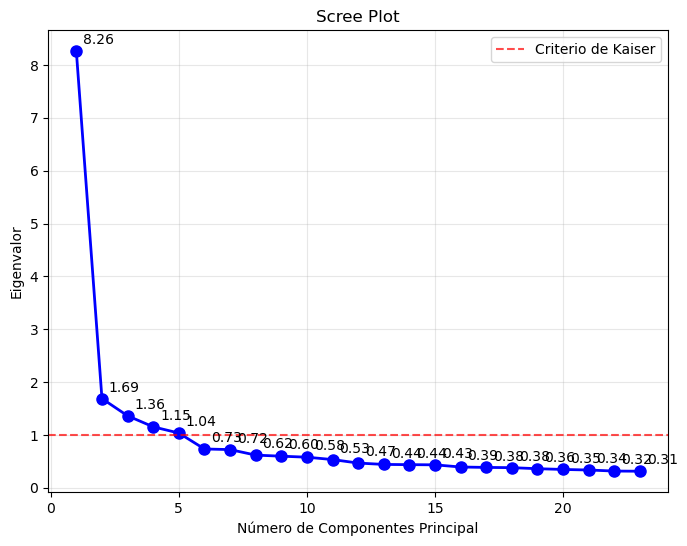

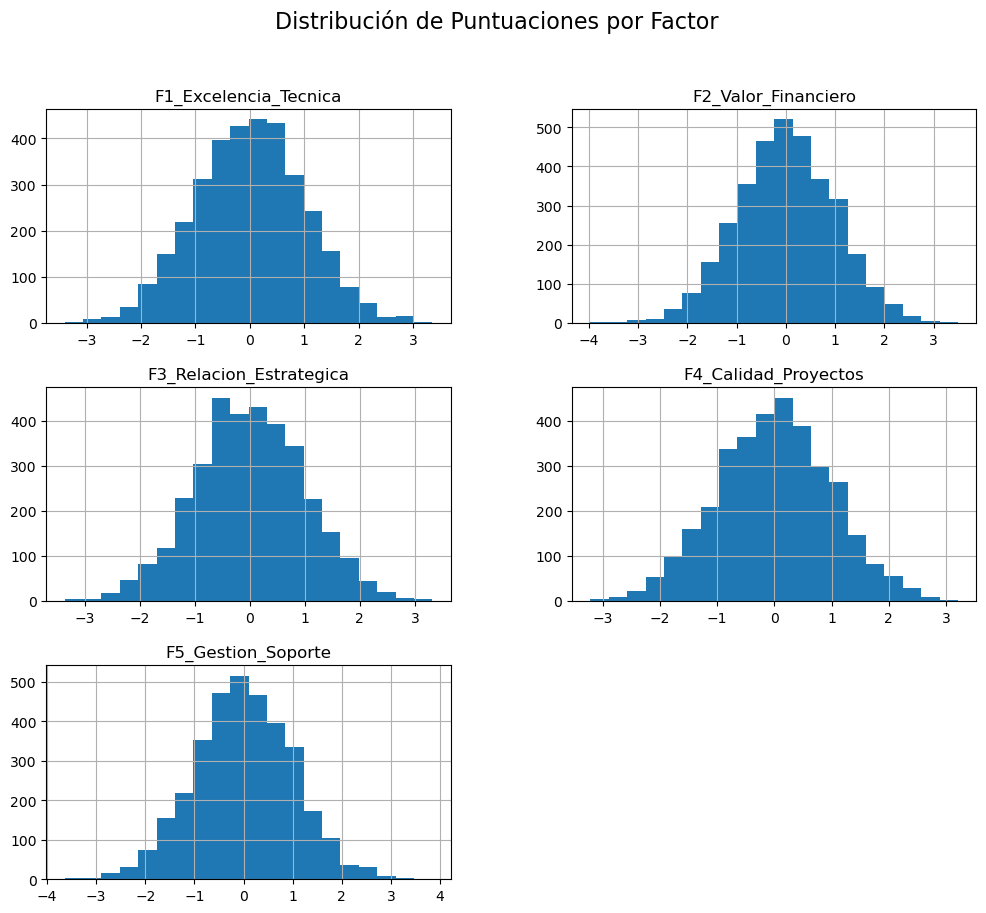

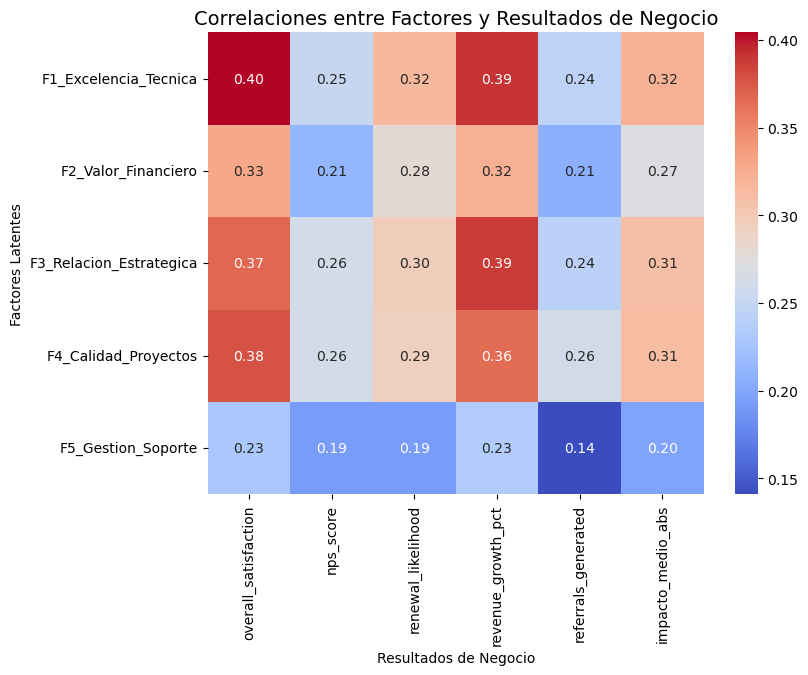

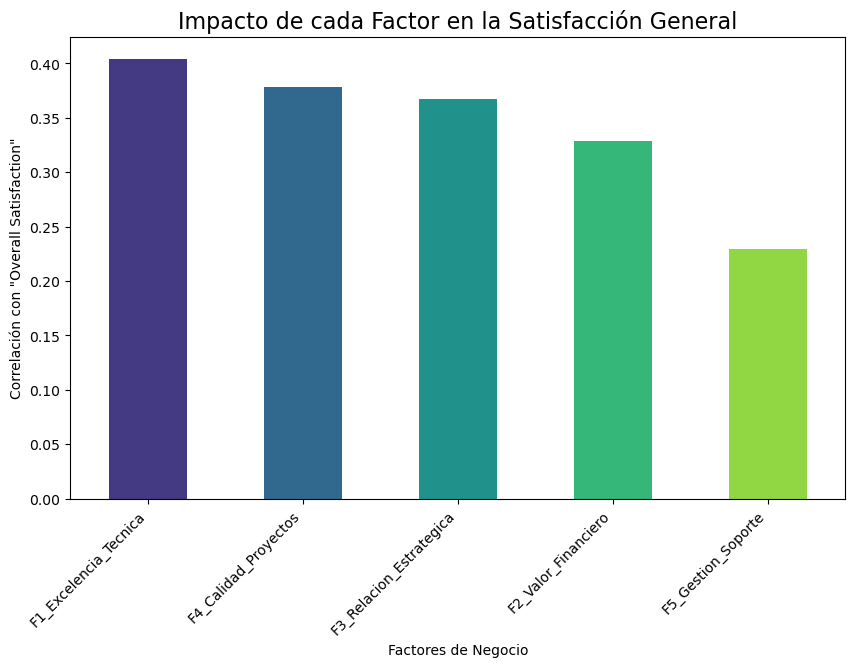

In [31]:
# --- PASO 4.1: VISUALIZACIÓN ---

# a) Visualización de Cargas Factoriales (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Cargas Factoriales', fontsize=16)
plt.ylabel('Variables de Satisfacción')
plt.xlabel('Factores Latentes')
plt.show()

# Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, "bo-", linewidth=2, markersize=8)
plt.axhline(y=1, color="red", linestyle="--", alpha=0.7, label="Criterio de Kaiser")
plt.title("Scree Plot")
plt.xlabel("Número de Componentes Principal")
plt.ylabel("Eigenvalor")
plt.grid(True, alpha=0.3)
plt.legend()

for i, eigenval in enumerate(eigenvalues, 1):
    plt.annotate(
        f"{eigenval:.2f}",
        (i, eigenval),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )

# Varianza explicada
# Supongamos que ya tienes eigenvalues
explained_var = eigenvalues / np.sum(eigenvalues)
cum_var = np.cumsum(explained_var)
components = np.arange(1, len(explained_var)+1)

import plotly.graph_objects as go

fig_var = go.Figure()

# Varianza individual
fig_var.add_trace(go.Bar(
    x=components,
    y=explained_var[:6],
    name='Varianza individual',
    marker_color='royalblue'
))

# Varianza acumulada
fig_var.add_trace(go.Scatter(
    x=components,
    y=cum_var[:5],
    name='Varianza acumulada',
    mode='lines+markers',
    line=dict(color='firebrick', width=3),
    marker=dict(size=8)
))

fig_var.update_layout(
    title='Varianza explicada y acumulada por factor',
    xaxis_title='Factor',
    yaxis_title='Proporción de varianza',
    yaxis=dict(range=[0,1.05]),
    legend=dict(x=0.7, y=0.9),
    width=700,
    height=450,
    template='plotly_white'
)

fig_var.show()



# c) Distribución de Factor Scores
factor_scores.hist(figsize=(12, 10), bins=20, layout=(3, 2))
plt.suptitle('Distribución de Puntuaciones por Factor', fontsize=16)
plt.show()

# e) Correlación entre factores y resultados de negocio
plt.figure(figsize=(8, 6))
sns.heatmap(business_impact_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones entre Factores y Resultados de Negocio', fontsize=14)
plt.xlabel('Resultados de Negocio')
plt.ylabel('Factores Latentes')
plt.show()



# d) Resumen de Impacto en el Negocio
# Usaremos 'overall_satisfaction' como la métrica principal
impact_summary = business_impact_corr['overall_satisfaction'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
impact_summary.plot(kind='bar', color=sns.color_palette('viridis', 5))
plt.title('Impacto de cada Factor en la Satisfacción General', fontsize=16)
plt.ylabel('Correlación con "Overall Satisfaction"')
plt.xlabel('Factores de Negocio')
plt.xticks(rotation=45, ha='right')
plt.show()


plt.show()
plt.show()

#4.2 Summary
El análisis de satisfacción del cliente se realizó sobre una base de 3400 encuestas con 31 variables, de las cuales 23 corresponden a dimensiones de servicio y 5 a resultados de negocio. La calidad de los datos fue adecuada para un análisis factorial, con un KMO de 0.95 y un nivel de correlación suficiente entre variables. A partir de los criterios de Kaiser, el scree plot y la varianza explicada, se determinó que cinco factores latentes representan de manera robusta la estructura de la información.

El primer factor corresponde a Excelencia Técnica e Innovación, y concentra las percepciones sobre experiencia técnica, resolución de problemas y calidad de entregables. El segundo factor refleja Valor Financiero y Transparencia, asociado a precios competitivos, retorno de inversión y claridad en costos. El tercer factor se relaciona con la Relación Estratégica y la Comunicación, donde influyen la confianza, la claridad y el acceso a ejecutivos. El cuarto factor corresponde a la Gestión de Proyectos y Calidad Operativa, vinculado con la puntualidad, el control presupuestal y la calidad de la entrega. Finalmente, el quinto factor agrupa aspectos de Soporte y Servicio, como la capacidad de respuesta, la gestión del cambio y la capacitación.

Los resultados muestran que la satisfacción general está explicada en un 60% por estos cinco factores, siendo la Excelencia Técnica el predictor más fuerte, seguido por Innovación y Documentación, y la Relación Estratégica. En el caso del NPS, los factores con mayor peso son la Relación Estratégica, la Innovación y la Excelencia Técnica, aunque el modelo explica un 28% de la varianza, lo que indica que la recomendación depende también de elementos externos al servicio.

A partir de estos hallazgos, se plantean tres recomendaciones principales. Primero, consolidar la superioridad técnica como eje central de la propuesta de valor, asegurando calidad en los entregables y resolviendo problemas complejos de manera consistente. Segundo, fortalecer el rol de los account managers como socios estratégicos, fomentando la confianza y la comunicación proactiva con los clientes. Tercero, institucionalizar espacios de innovación aplicada, como reuniones trimestrales con clientes clave para presentar tendencias tecnológicas y roadmaps de desarrollo.

El impacto esperado de estas acciones es un incremento sostenido en la satisfacción general y en la probabilidad de renovación de contratos, así como una mejora en la generación de referidos y en la percepción de valor económico. En conjunto, los resultados confirman que la ventaja competitiva de TechnoServe se encuentra en la combinación de excelencia técnica, gestión de proyectos y relaciones estratégicas sólidas, y que el reto principal es traducir estas fortalezas en una narrativa clara de valor para el cliente.

**Miembros**

Paulina Leal Mosqueda, A01659576 - Exploración de datos y extracción de factores


Santiago Nava Figueroa, A01174557 y Paulina Leal Mosqueda, A01659576- Interpretación de factores y business insights

Santiago Nava Figueroa - Visualización y recomendaciones